# Random Walks
**Author: Gavin DeBrun**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return

## 1: Unbiased Random Walks

### a.  Plot a random walk

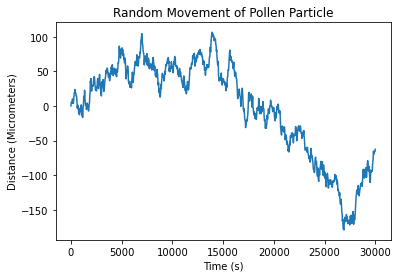

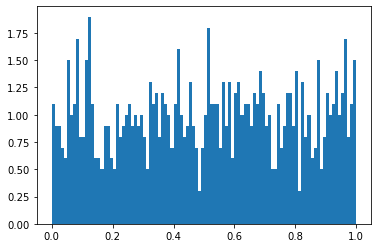

In [2]:
resetMe()
def walk(jump, initialPosition, initialTime):
  averageJump = jump
  positions = []
  positions.append(initialPosition)
  times = []
  times.append(initialTime)

  for i in range(0, 1000):
    newPosition = positions[i] + averageJump * np.random.randn()
    positions.append(newPosition)
    times.append((i+1)*30)
  return np.array(positions), np.array(times)

positions, times = walk(6, 0,0)
plt.plot(times,positions)
plt.title("Random Movement of Pollen Particle")
plt.xlabel("Time (s)")
plt.ylabel("Distance (Micrometers)")
plt.show()

x = []
x.append(42)
a = 1103515245
c = 12345
m = 1<<31
for i in range(0,1000):
  x_i = (a*x[i] + c) % m
  x.append(x_i)
x = np.array(x)
x = x/m
plt.hist(x, 100, density = 1)
plt.show()

### b. Random Walk Averages

|which random walk| $x_0$(µm)|$x_1$(µm)|$x_2$(µm)|...|$x_{999}$(µm)|
|-----------------|----------|---------|---------|---|-----------|
|0                | 0 | 0.48|7.4|&nbsp;|0.81|
|1                | 0 | -1.5|1.3|&nbsp;|7.5|
|2                | 0 | -3.3|-2.6|&nbsp;|6.8|
|...                | ... | ...|...|&nbsp;|...|
|1,999                | 0. | 88.5|-42.2|&nbsp;|74.1|
|averages| $\langle x_0\rangle=0$ |$\langle x_1\rangle=37.8$|$\langle x_2\rangle=45.1$|...|$\langle x_{999}\rangle=0.51$|

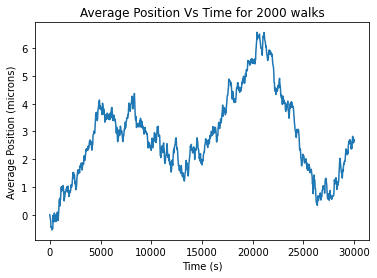

In [3]:
positions = np.zeros(1001)
times = []
for i in range(2000):
  positions += walk(6,0,0)[0]
  if (i == 0):
    times = walk(6,0,0)[1]

average = positions / 2000
plt.plot(times, average)
plt.xlabel("Time (s)")
plt.ylabel("Average Position (microns)")
plt.title("Average Position Vs Time for 2000 walks")
plt.show()

### c. Computing average distance

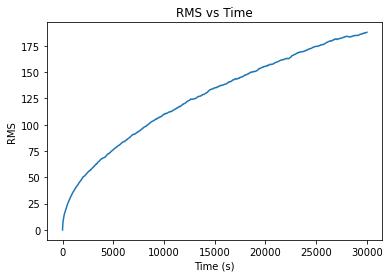

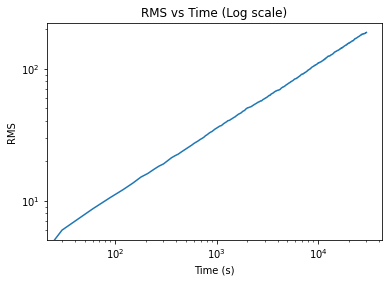

Alpha is: 0.5002443216963508


In [4]:
positions = np.zeros(1001)
positionsSquared = np.zeros(1001)
times = []
for i in range(2000):
  new_walk = walk(6,0,0)[0]
  positions += new_walk
  positionsSquared += new_walk**2
  if i == 0:
    times = walk(6,0,0)[1]

averagePositions = positions/2000
averagePositionsSquared = positionsSquared/2000
plt.plot(times, np.sqrt((averagePositionsSquared - averagePositions)))
plt.xlabel("Time (s)")
plt.ylabel("RMS")
plt.title("RMS vs Time")
plt.show()

plt.plot(times, np.sqrt((averagePositionsSquared - averagePositions)))
plt.xscale("log")
plt.yscale("log")
plt.title("RMS vs Time (Log scale)")
plt.xlabel("Time (s)")
plt.ylabel("RMS")
plt.show()

print("Alpha is:", np.polyfit(np.log(times[1:]), np.log(np.sqrt((averagePositionsSquared[1:] - averagePositions[1:]))), 1)[0])

## 2: Random Walks in Two Dimensions

### 2D Walks

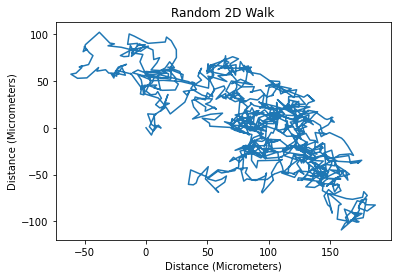

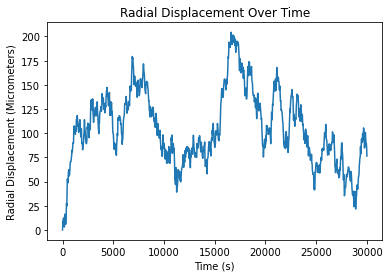

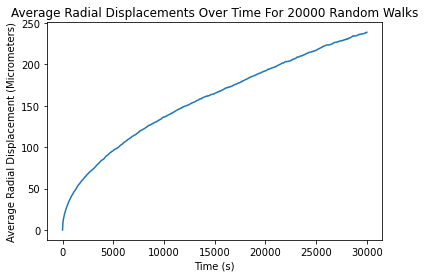

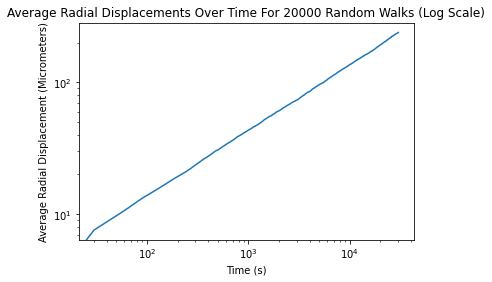

Alpha is: 0.5018074943711062


In [5]:
resetMe()
def Walk2D(initialPosition, initialTime, jump):
  averageJump = jump
  positions = []
  positions.append(initialPosition)
  times = []
  times.append(initialTime)
  radialDisplacements = []
  radialDisplacements.append(np.sqrt(initialPosition[0]**2 + initialPosition[1]**2))

  for i in range(1000):
    newPosition = positions[i] + averageJump * np.array([np.random.randn(), np.random.randn()])
    positions.append(newPosition)
    times.append((i + 1)*30)
    radialDisplacements.append(np.sqrt(newPosition[0]**2 + newPosition[1]**2))
  return np.array(positions), np.array(radialDisplacements), np.array(times)

positions, displacements, times = Walk2D(np.array([0,0]), 0, 6)
plt.plot(positions[:,0], positions[:,1])
plt.title("Random 2D Walk")
plt.xlabel("Distance (Micrometers)")
plt.ylabel("Distance (Micrometers)")
plt.show()

plt.plot(times, displacements)
plt.title("Radial Displacement Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Radial Displacement (Micrometers)")
plt.show()

displacements = np.zeros((1001))
times = []
for i in range(2000):
  position, displacement, time = Walk2D(np.array([0,0]), 0, 6)
  displacements += displacement
  if i ==0:
    times = time
plt.plot(times, displacements/2000)
plt.title("Average Radial Displacements Over Time For 20000 Random Walks")
plt.xlabel("Time (s)")
plt.ylabel("Average Radial Displacement (Micrometers)")
plt.show()

plt.plot(times, displacements/2000 )
plt.title("Average Radial Displacements Over Time For 20000 Random Walks (Log Scale)")
plt.xlabel("Time (s)")
plt.ylabel("Average Radial Displacement (Micrometers)")
plt.xscale("log")
plt.yscale("log")
plt.show()

print("Alpha is:", np.polyfit(np.log(times[1:]), np.log(displacements[1:]), 1)[0])